In [1]:
# all modules necessary for this nb
import os
import sys
import pickle

import numpy as np
import pylab as pl
import scipy.stats as sstats

# setting parameters for default matplotlib plots
%matplotlib inline

In [2]:
pl.style.use('fabiostyle')
# needs to find the library of functions
sys.path.append('../../code/')  # to be replaced!

import utils as ut
import plots as pt

In [3]:
NOTEBOOK_NAME = 'similarity_bigmatrix_post_tbs'

In [4]:
from pickleshare import PickleShareDB

autorestore_folder = os.path.join(os.getcwd(), 'autorestore', NOTEBOOK_NAME)
db = PickleShareDB(autorestore_folder)
import sys
from workspace import *
import IPython
ip = IPython.get_ipython()

# this will restore all the saved variables. ignore the errors listed.
#load_workspace(ip, db)

# use `save_worspace(db)` to save variables at the end

In [5]:
from itertools import product
def load_all_animals_vars(varname, animal_list, pilot_list=None, notebook='preprocessing', session='',
                          func=lambda x: x):
    all_of_them = {}
    for ani in animal_list:
        try:
            folder = '../%s/%s/notebooks/autorestore/%s/' % (ani, session, notebook)
            all_of_them.update({ani: func(ut.load_variable(varname, folder))})
        except IOError:
            print "Nope: %s, %s, %s" % (ani, session, varname)
    return all_of_them

In [6]:
#exclude c10m6 (dentate animal)
expo_animals_vhpc = 'c3m1', 'c3m2', 'c3f3', 'c10m8'
pre_animals_vhpc = 'c3m1', 'c3m2', 'c3f3', 'c10m8'
post_animals_vhpc = '90','90_475','91','93_500','93_580','93_720','93_810','c3m1', 'c3m2', 'c3f3', 'c10m8'
#context_switch_animals = '90','93_720','93_810','c3m1','c3m1_725','c3m2','c3m2_645','c3f3','c10m8'

In [7]:
expo_animals_dhpc = 'dhpc35','dhpc36',
pre_animals_dhpc =  'dhpc35','dhpc36',
post_animals_dhpc = 'dhpc35','dhpc36','dhpc35_254'

In [8]:
vhpc_animals = ['90','90_475','91','93_500','93_580','93_720','93_810','c3m1', 'c3m2', 'c3f3', 'c10m8']
dhpc_animals = ['dhpc35','dhpc36','dhpc35_254']
all_animals = vhpc_animals+dhpc_animals

In [9]:
sessions = 'expo', 'pre', 'post'

In [10]:
for reg in 'dhpc','vhpc':
    for sess in 'pre', 'post':
        exec("patterns_tb_%s_%s = dict(zip(%s_animals_%s, [ut.load_variable('patterns_tb',\
                                                               '../%%s/%s/notebooks/autorestore/decoding_around_onset/'%%ani)\
                                                      for ani in %s_animals_%s]))"%(sess, reg, sess, reg, sess, sess, reg))
        exec("labels_%s_%s = dict(zip(%s_animals_%s, [ut.load_variable('labels',\
                                                             '../%%s/%s/notebooks/autorestore/decoding_around_onset/'%%ani)\
                                                      for ani in %s_animals_%s]))"%(sess, reg, sess, reg, sess, sess, reg))

In [11]:
#have to extract 4_odor_expo varibles differently from that used above
for reg in 'dhpc','vhpc':
    for sess in 'expo',:
        exec("patterns_tb_%s_%s = dict(zip(%s_animals_%s, [ut.load_variable('patterns_tb',\
                                                               '../%%s/4_odor_expo/notebooks/autorestore/decoding_around_onset/'%%ani)\
                                                      for ani in %s_animals_%s]))"%(sess, reg, sess, reg, sess, reg))
        exec("labels_%s_%s = dict(zip(%s_animals_%s, [ut.load_variable('labels',\
                                                             '../%%s/4_odor_expo/notebooks/autorestore/decoding_around_onset/'%%ani)\
                                                      for ani in %s_animals_%s]))"%(sess, reg, sess, reg, sess, reg))

In [12]:
#since c3m1 pre tb0 started at -4 (instead of -5), make a -5 tb by taking average of tb of -4 thru -2 (likely just noise anyway)
avg_tb = patterns_tb_pre_vhpc['c3m1'][:3].mean(0)
patterns_tb_pre_vhpc['c3m1'] = list(patterns_tb_pre_vhpc['c3m1'])
patterns_tb_pre_vhpc['c3m1'].append(avg_tb)

for x in range(len(patterns_tb_pre_vhpc['c3m1'])-2,-1,-1):
    patterns_tb_pre_vhpc['c3m1'][x+1]=patterns_tb_pre_vhpc['c3m1'][x]

patterns_tb_pre_vhpc['c3m1'][0] = np.mean(patterns_tb_pre_vhpc['c3m1'][1:4],0)

In [13]:
patterns_tb_expo_dhpc.keys()

['dhpc35', 'dhpc36']

In [20]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
for t in range(14):
    for reg in 'dhpc','vhpc':
        for sess in sessions:
            exec("scaled_patterns_tb%s_%s_%s = {}"%(t,sess,reg))
            for ani in eval("patterns_tb_%s_%s"%(sess,reg)):
                exec("scaled_patterns_tb%s_%s_%s[ani] = StandardScaler().fit_transform(patterns_tb_%s_%s[ani][t])"%(t,sess,reg,sess,reg))
            #print normalized_patterns_tb_post

In [78]:
#from sklearn.preprocessing import StandardScaler
#patterns = load_all_animals_vars('patterns_tb[5]', all_animals, notebook='decoding_around_onset', session='post',
#                                     func=lambda x: StandardScaler().fit_transform(x))
#labels = load_all_animals_vars('labels', all_animals, notebook='decoding_around_onset', session='post')

In [59]:
#just look at trace tb here for post session (to compare to working nb)
pattern_ids = range(1, 5)
for reg in 'dhpc','vhpc':
    for t in range(14):
        exec("res_tb%s_%s = {}"%(t,reg))
        for ani in eval("patterns_tb_post_%s.keys()"%(reg)):
            all_patterns = [eval("patterns_tb_post_%s[ani][t][labels_post_%s[ani]==i]"%(reg,reg)) for i in range(1, 5)]
            corrmat_distr, corrmat = ut.compute_similarity_matrix(pattern_ids, all_patterns)
            exec("res_tb%s_%s[ani] = corrmat_distr"%(t,reg))
            print ".",

. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .


In [57]:
##SCALING APPLIED, all tbs
pattern_ids = range(1, 5)
for reg in 'dhpc','vhpc':
    for t in range(14):
        exec("scaled_res_tb%s_%s = {}"%(t,reg))
        for ani in eval("scaled_patterns_tb%s_post_%s.keys()"%(t,reg)):
            all_scaled_patterns = [eval("scaled_patterns_tb%s_post_%s[ani][labels_post_%s[ani]==i]"%(t,reg,reg)) for i in range(1, 5)]
            corrmat_distr, corrmat = ut.compute_similarity_matrix(pattern_ids, all_scaled_patterns)
            exec("scaled_res_tb%s_%s[ani] = corrmat_distr"%(t,reg))
            print ".",

. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .


In [61]:
#values_d = np.r_[[[np.mean(res[ani][(p1, p2)]) for ani in dhpc_animals]
#                for p1, p2 in product(pattern_ids, repeat=2)]].mean(1).reshape(len(pattern_ids), -1)
#values_v = np.r_[[[np.mean(res[ani][(p1, p2)]) for ani in vhpc_animals]
#                for p1, p2 in product(pattern_ids, repeat=2)]].mean(1).reshape(len(pattern_ids), -1)
#values_v_noc10m8 = np.r_[[[np.mean(res[ani][(p1, p2)]) for ani in vhpc_animals[:-1]]
#                for p1, p2 in product(pattern_ids, repeat=2)]].mean(1).reshape(len(pattern_ids), -1)
for reg in 'dhpc','vhpc':
    for t in range(14):
        exec("values_tb%s_post_%s = np.r_[[[np.mean(res_tb%s_%s[ani][(p1, p2)]) for ani in post_animals_%s]\
                        for p1, p2 in product(pattern_ids, repeat=2)]].mean(1).reshape(len(pattern_ids), -1)"%(t,reg,t,reg,reg))
        #normalized_values_post = np.r_[[[np.mean(normalized_res[ani][(p1, p2)]) for ani in post_animals]
        #                for p1, p2 in product(pattern_ids, repeat=2)]].mean(1).reshape(len(pattern_ids), -1)
        exec("scaled_values_tb%s_post_%s = np.r_[[[np.mean(scaled_res_tb%s_%s[ani][(p1, p2)]) for ani in post_animals_%s]\
                        for p1, p2 in product(pattern_ids, repeat=2)]].mean(1).reshape(len(pattern_ids), -1)"%(t,reg,t,reg,reg))

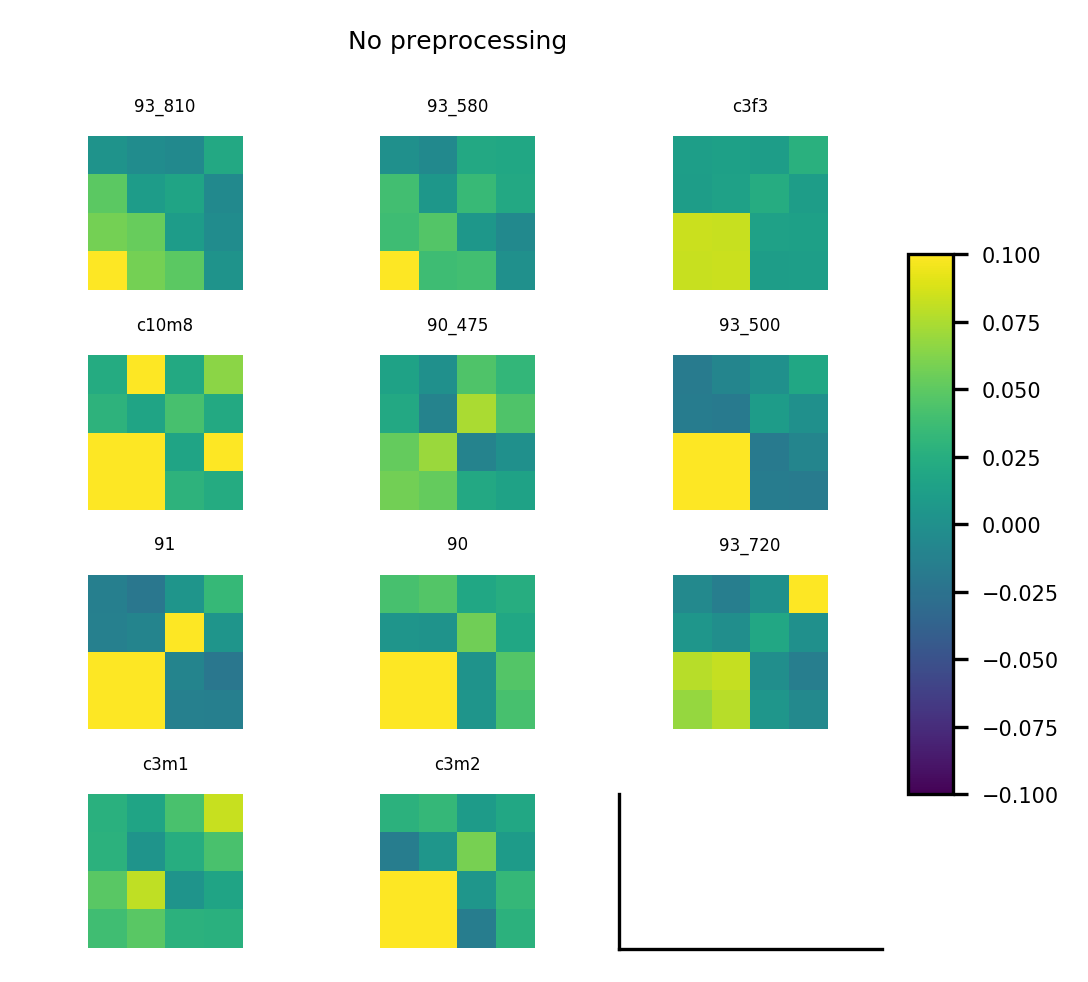

In [63]:
t = 8 #which tb do you wanna look at?
fig, axs = pl.subplots(4, 3, figsize=(3,3),sharex=True, sharey=True)
for ani, ax in zip(patterns_tb_post_vhpc.keys(), axs.flatten()):
    im = ax.imshow(np.r_[[np.mean(eval("res_tb%s_vhpc"%(t))[ani][(p1, p2)]) for p1, p2 in product(pattern_ids, repeat=2)]].reshape(len(pattern_ids), -1),
              origin='lower', aspect='equal', vmin=-0.1, vmax=0.1)
    pt.remove_axes(ax)
    ax.set_title(ani, fontsize=4)
ax = fig.add_axes((1, 0.2, 0.05, 0.6))
fig.suptitle('No preprocessing',y=1.05)
fig.colorbar(im, cax=ax)
fig.tight_layout()

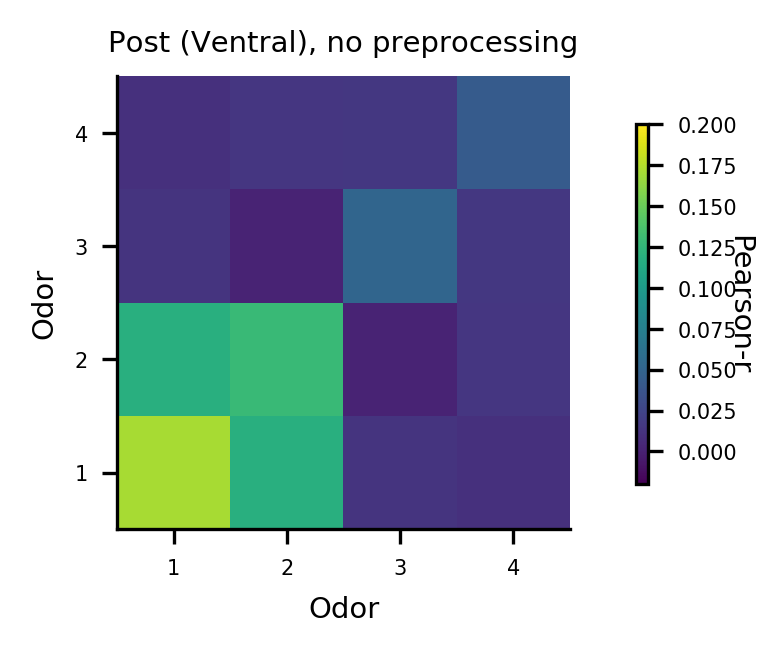

In [69]:
t=8 # which time bin you wanna plot?

fig, ax = pl.subplots(1, 1, figsize=(2, 2), sharex=True, sharey=True)
im = ax.imshow(eval("values_tb%s_post_vhpc"%(t)), origin='lower', aspect='equal', vmin=-0.02, vmax=0.2, cmap=pl.cm.viridis)

# pt.nicer_plot(ax)
ax.set_xlim(-0.5, eval("values_tb%s_post_vhpc"%(t)).shape[0]-0.5)
ax.set_xticks(range(eval("values_tb%s_post_vhpc"%(t)).shape[0]))
ax.set_xticklabels(pattern_ids)
ax.set_ylim(-0.5, eval("values_tb%s_post_vhpc"%(t)).shape[0]-0.5)
ax.set_yticks(range(eval("values_tb%s_post_vhpc"%(t)).shape[0]))
ax.set_yticklabels(pattern_ids)

ax.set_xlabel('Odor')
ax.set_ylabel('Odor')
ax.set_title('Post (Ventral), no preprocessing')

ax = fig.add_axes((1, 0.2, 0.02, 0.6))
fig.colorbar(im, cax=ax)
ax.set_ylabel('Pearson-r',rotation=-90)

fig.savefig('../img/%s_vhpc.jpg'%NOTEBOOK_NAME)

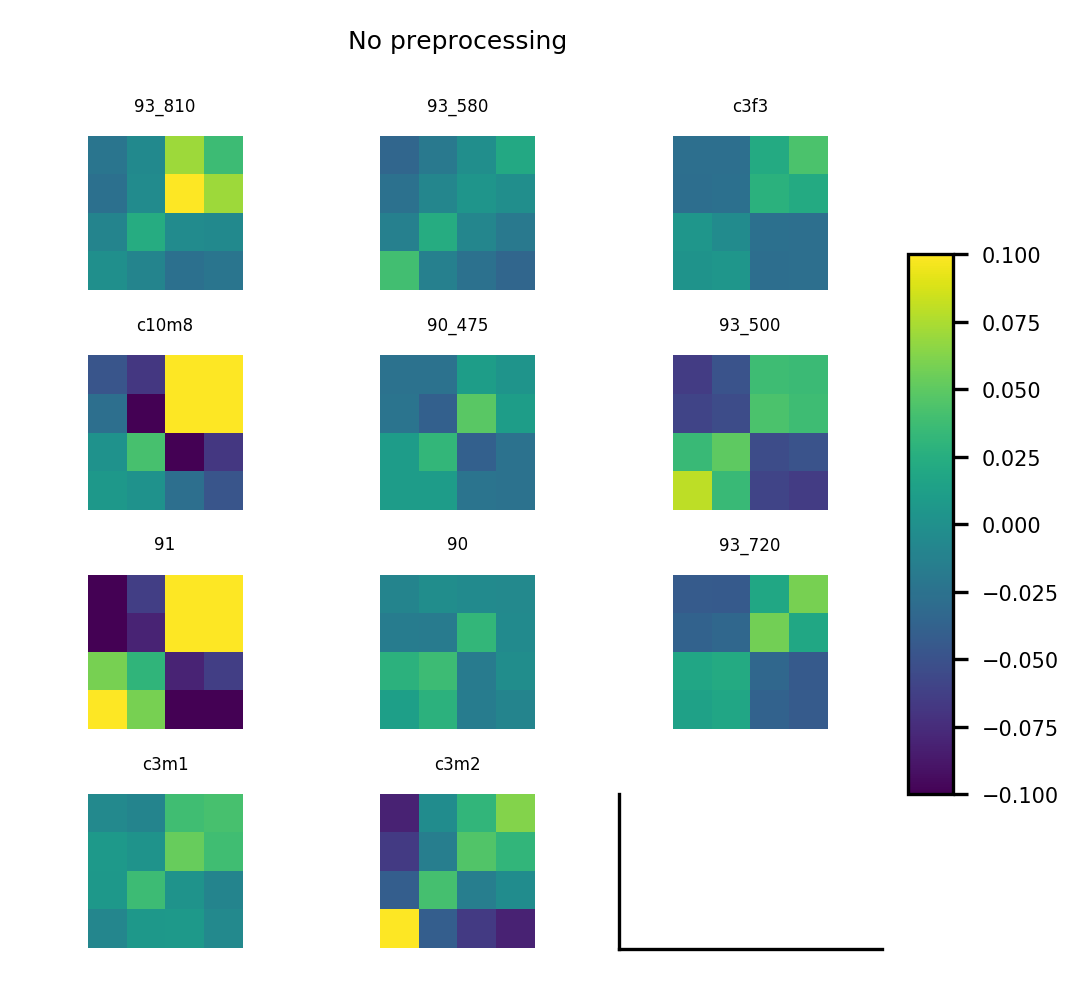

In [68]:
t = 8 #which tb do you wanna look at?
fig, axs = pl.subplots(4, 3, figsize=(3,3),sharex=True, sharey=True)
for ani, ax in zip(patterns_tb_post_vhpc.keys(), axs.flatten()):
    im = ax.imshow(np.r_[[np.mean(eval("scaled_res_tb%s_vhpc"%(t))[ani][(p1, p2)]) for p1, p2 in product(pattern_ids, repeat=2)]].reshape(len(pattern_ids), -1),
              origin='lower', aspect='equal', vmin=-0.1, vmax=0.1)
    pt.remove_axes(ax)
    ax.set_title(ani, fontsize=4)
ax = fig.add_axes((1, 0.2, 0.05, 0.6))
fig.suptitle('No preprocessing',y=1.05)
fig.colorbar(im, cax=ax)
fig.tight_layout()

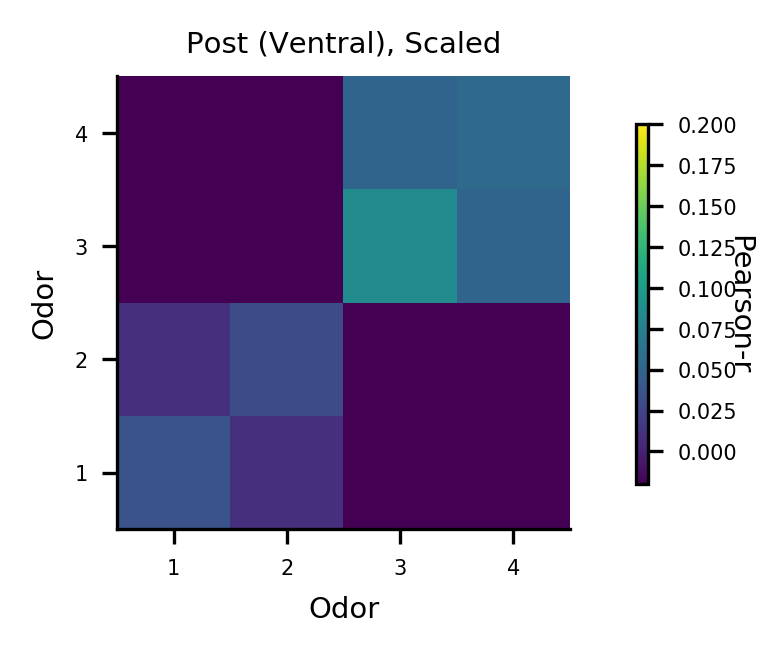

In [70]:
t=8 # which time bin you wanna plot?

fig, ax = pl.subplots(1, 1, figsize=(2, 2), sharex=True, sharey=True)
im = ax.imshow(eval("scaled_values_tb%s_post_vhpc"%(t)), origin='lower', aspect='equal', vmin=-0.02, vmax=0.2, cmap=pl.cm.viridis)

# pt.nicer_plot(ax)
ax.set_xlim(-0.5, eval("scaled_values_tb%s_post_vhpc"%(t)).shape[0]-0.5)
ax.set_xticks(range(eval("scaled_values_tb%s_post_vhpc"%(t)).shape[0]))
ax.set_xticklabels(pattern_ids)
ax.set_ylim(-0.5, eval("scaled_values_tb%s_post_vhpc"%(t)).shape[0]-0.5)
ax.set_yticks(range(eval("scaled_values_tb%s_post_vhpc"%(t)).shape[0]))
ax.set_yticklabels(pattern_ids)

ax.set_xlabel('Odor')
ax.set_ylabel('Odor')
ax.set_title('Post (Ventral), Scaled')

ax = fig.add_axes((1, 0.2, 0.02, 0.6))
fig.colorbar(im, cax=ax)
ax.set_ylabel('Pearson-r',rotation=-90)

fig.savefig('../img/%s_vhpc.jpg'%NOTEBOOK_NAME)

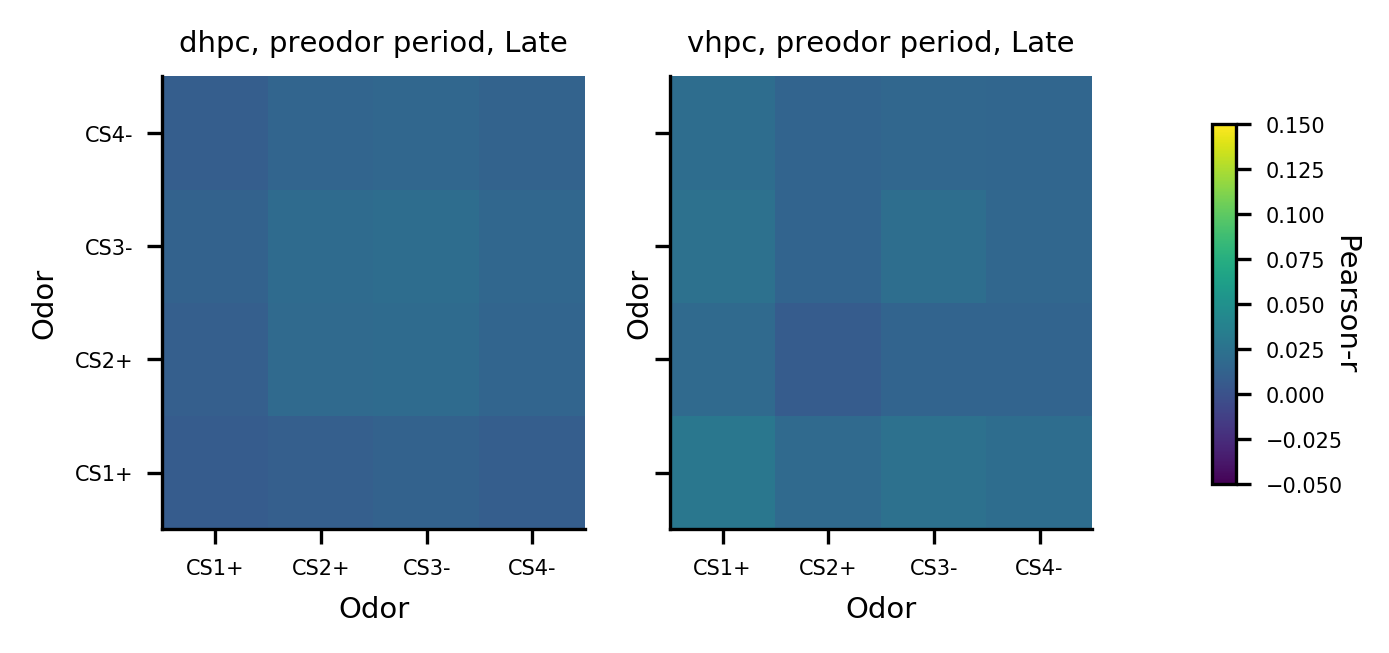

In [101]:
tb = 4 #which time bin do you wish to plot?

fig, ax = pl.subplots(1, 2, figsize=(4, 2), sharex=True, sharey=True)
for r, reg in zip(range(2),['dhpc','vhpc']):
    im = ax[r].pcolormesh(eval("scaled_values_tb%s_post_%s"%(tb,reg)),vmin=-0.05, vmax=0.15)

    # pt.nicer_plot(ax)
    ax[r].set_xlim(0, eval("scaled_values_tb%s_post_%s"%(t,reg)).shape[0])
    ax[r].set_xticks([.5,1.5,2.5,3.5])
    ax[r].set_xticklabels(['CS1+','CS2+','CS3-','CS4-'])
    ax[r].set_ylim(0, eval("scaled_values_tb%s_post_%s"%(t,reg)).shape[0])
    ax[r].set_yticks([.5,1.5,2.5,3.5])
    ax[r].set_yticklabels((['CS1+','CS2+','CS3-','CS4-']))
    
    ax[r].set_xlabel('Odor')
    ax[r].set_ylabel('Odor')
    ax[r].set_title(reg+', preodor period, Late')

ax = fig.add_axes((1, 0.2, 0.02, 0.6))
fig.colorbar(im, cax=ax)
ax.set_ylabel('Pearson-r',rotation=-90)

fig.savefig('../figures/%s_baseline_late.pdf'%NOTEBOOK_NAME)

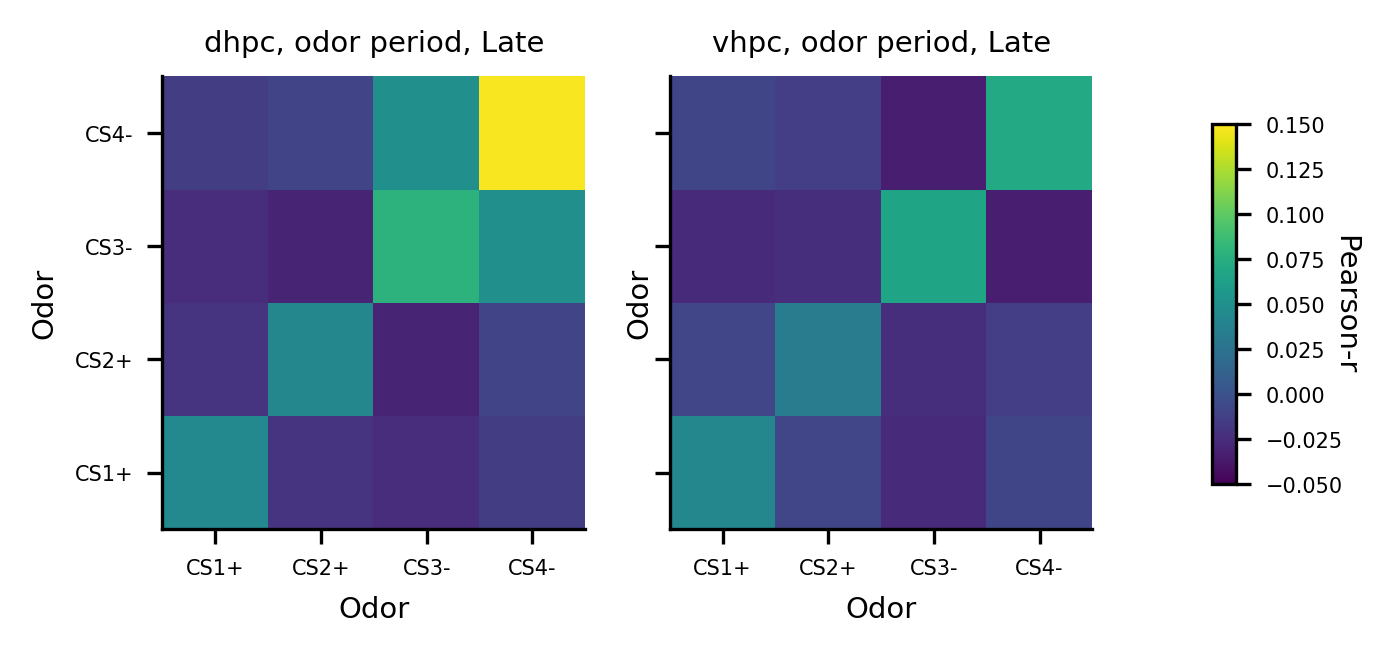

In [100]:
tb = 6 #which time bin do you wish to plot?

fig, ax = pl.subplots(1, 2, figsize=(4, 2), sharex=True, sharey=True)
for r, reg in zip(range(2),['dhpc','vhpc']):
    im = ax[r].pcolormesh(eval("scaled_values_tb%s_post_%s"%(tb,reg)),vmin=-0.05, vmax=0.15)

    # pt.nicer_plot(ax)
    ax[r].set_xlim(0, eval("scaled_values_tb%s_post_%s"%(t,reg)).shape[0])
    ax[r].set_xticks([.5,1.5,2.5,3.5])
    ax[r].set_xticklabels(['CS1+','CS2+','CS3-','CS4-'])
    ax[r].set_ylim(0, eval("scaled_values_tb%s_post_%s"%(t,reg)).shape[0])
    ax[r].set_yticks([.5,1.5,2.5,3.5])
    ax[r].set_yticklabels((['CS1+','CS2+','CS3-','CS4-']))
    
    ax[r].set_xlabel('Odor')
    ax[r].set_ylabel('Odor')
    ax[r].set_title(reg+', odor period, Late')

ax = fig.add_axes((1, 0.2, 0.02, 0.6))
fig.colorbar(im, cax=ax)
ax.set_ylabel('Pearson-r',rotation=-90)

fig.savefig('../figures/%s_CS_late.pdf'%NOTEBOOK_NAME)

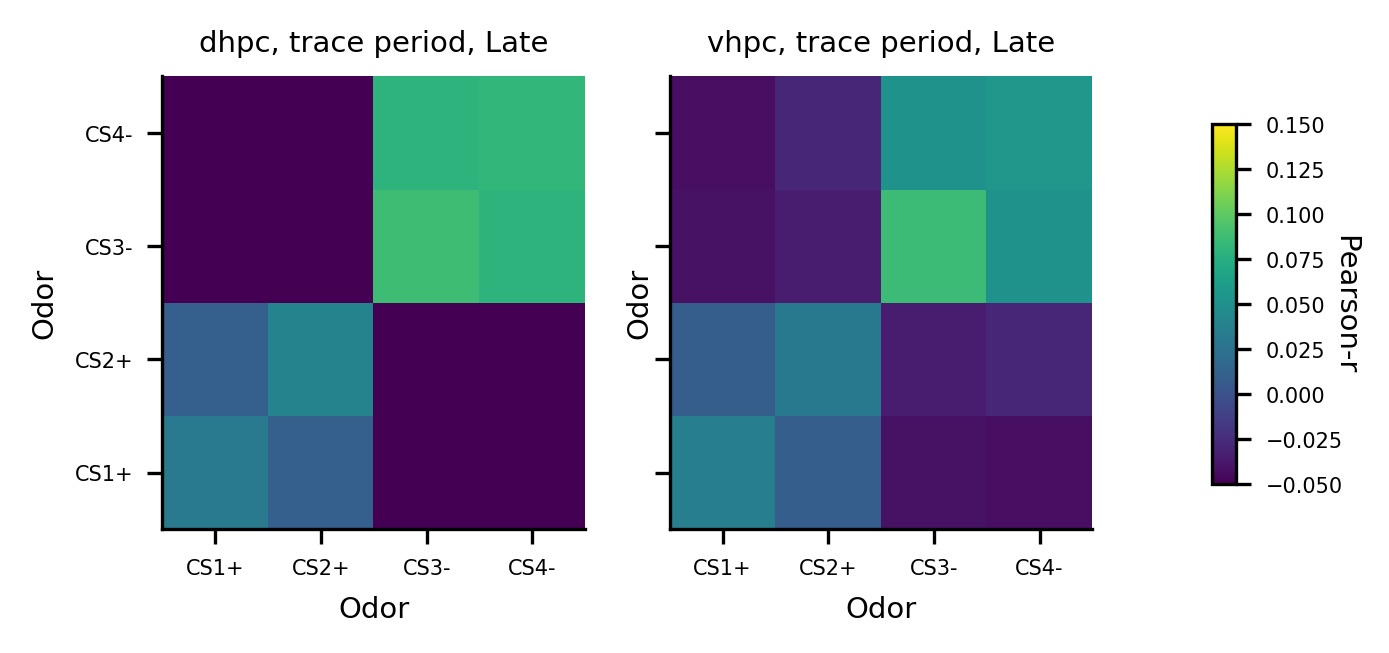

In [99]:
tb = 8 #which time bin do you wish to plot?

fig, ax = pl.subplots(1, 2, figsize=(4, 2), sharex=True, sharey=True)
for r, reg in zip(range(2),['dhpc','vhpc']):
    im = ax[r].pcolormesh(eval("scaled_values_tb%s_post_%s"%(tb,reg)),vmin=-0.05, vmax=0.15)

    # pt.nicer_plot(ax)
    ax[r].set_xlim(0, eval("scaled_values_tb%s_post_%s"%(t,reg)).shape[0])
    ax[r].set_xticks([.5,1.5,2.5,3.5])
    ax[r].set_xticklabels(['CS1+','CS2+','CS3-','CS4-'])
    ax[r].set_ylim(0, eval("scaled_values_tb%s_post_%s"%(t,reg)).shape[0])
    ax[r].set_yticks([.5,1.5,2.5,3.5])
    ax[r].set_yticklabels((['CS1+','CS2+','CS3-','CS4-']))
    
    ax[r].set_xlabel('Odor')
    ax[r].set_ylabel('Odor')
    ax[r].set_title(reg+', trace period, Late')

ax = fig.add_axes((1, 0.2, 0.02, 0.6))
fig.colorbar(im, cax=ax)
ax.set_ylabel('Pearson-r',rotation=-90)

fig.savefig('../figures/%s_trace_late.pdf'%NOTEBOOK_NAME)

In [39]:
for sess in sessions:
    for reg in 'dhpc','vhpc':
        for t in range(14):
            exec("corrs_tb%s_%s_%s = {}"%(t,sess,reg))
            for ani in eval("scaled_patterns_tb0_%s_%s.keys()"%(sess,reg)):
                exec("all_patterns_%s_%s = np.concatenate([scaled_patterns_tb%s_%s_%s[ani][labels_%s_%s[ani]==i] for i in range(1, 5)])"%(sess,reg,t,sess,reg,sess,reg))
                #print [eval("(labels_%s_%s[ani]==i)"%(sess,reg)).sum() for i in range(1, 5)]
                exec("corrs_tb%s_%s_%s[ani] = [sstats.pearsonr(p1, p2)[0] for p1, p2 in product(all_patterns_%s_%s, repeat=2)]"%(t,sess,reg,sess,reg))
                print ".",

. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .


In [40]:
for reg in 'dhpc','vhpc':
    for sess in sessions:
        for t in range(14):
            exec("corrs_tb%s_%s_%s_mean = np.mean([corrs_tb%s_%s_%s[ani] for ani in %s_animals_%s], 0).reshape(len(pattern_ids)*30, -1)"%(t,sess,reg,t,sess,reg,sess,reg))
#corrs_d = np.mean([corrs[ani] for ani in dhpc_animals], 0).reshape(len(pattern_ids)*30, -1)
#corrs_v = np.mean([corrs[ani] for ani in vhpc_animals], 0).reshape(len(pattern_ids)*30, -1)

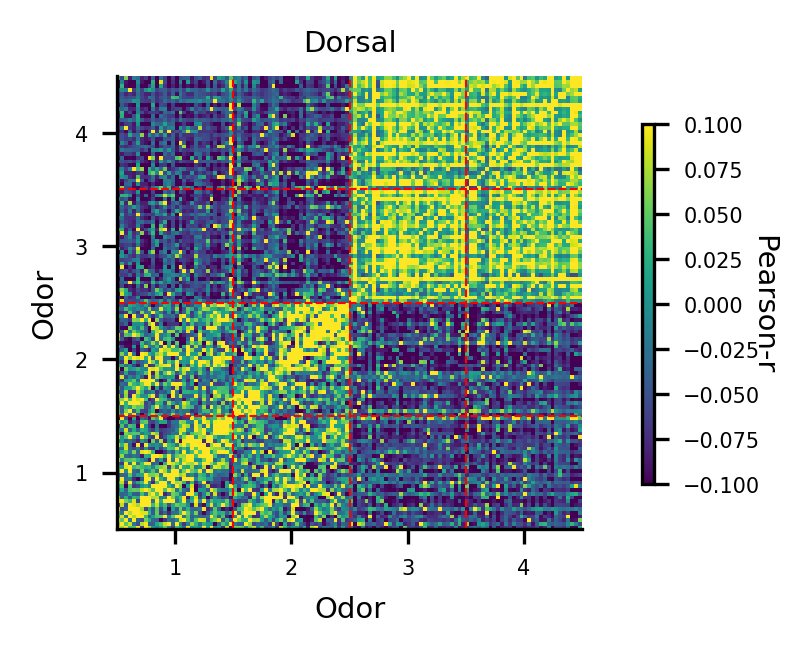

In [46]:
tb = 8 #which time bin do you wish to plot?

fig, ax = pl.subplots(1, 1, figsize=(2, 2), sharex=True, sharey=True)
im = ax.pcolormesh(eval("corrs_tb%s_post_dhpc_mean"%(tb)), vmin=-0.1, vmax=0.1)

pt.nicer_plot(ax)
ax.set_xlim(0, eval("corrs_tb%s_post_dhpc_mean"%(tb)).shape[0])
ax.set_xticks(np.arange(0, eval("corrs_tb%s_post_dhpc_mean"%(tb)).shape[0], eval("corrs_tb%s_post_dhpc_mean"%(tb)).shape[0]/len(pattern_ids))+eval("corrs_tb%s_post_dhpc_mean"%(tb)).shape[0]/len(pattern_ids)/2)
ax.set_xticklabels(pattern_ids)
ax.set_ylim(0, eval("corrs_tb%s_post_dhpc_mean"%(tb)).shape[0])
ax.set_yticks(np.arange(0, eval("corrs_tb%s_post_dhpc_mean"%(tb)).shape[0], eval("corrs_tb%s_post_dhpc_mean"%(tb)).shape[0]/len(pattern_ids))+eval("corrs_tb%s_post_dhpc_mean"%(tb)).shape[0]/len(pattern_ids)/2)
ax.set_yticklabels(pattern_ids)
ax.vlines(range(30, len(pattern_ids)*30, 30), 0, eval("corrs_tb%s_post_dhpc_mean"%(tb)).shape[0],
          color='r', linestyle='dashed', lw=0.5)
ax.hlines(range(30, len(pattern_ids)*30, 30), 0, eval("corrs_tb%s_post_dhpc_mean"%(tb)).shape[0],
          color='r', linestyle='dashed', lw=0.5)

ax.set_xlabel('Odor')
ax.set_ylabel('Odor')

ax.set_title('Dorsal')

ax = fig.add_axes((1, 0.2, 0.02, 0.6))
fig.colorbar(im, cax=ax)
ax.set_ylabel('Pearson-r',rotation=-90)


# axs[0].set_title('DG', fontsize=7)
# axs[1].set_title('LEC', fontsize=7)

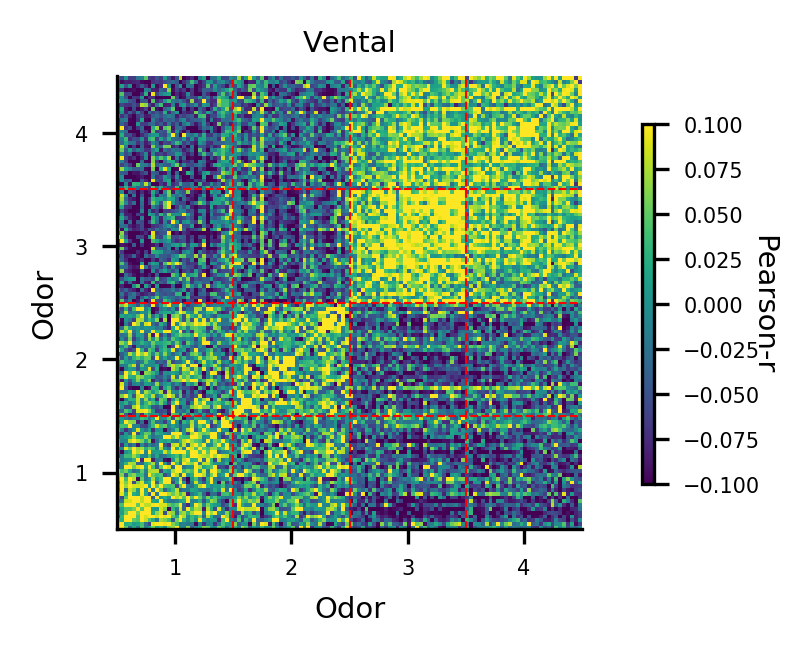

In [47]:
tb = 8 #which time bin do you wish to plot?

fig, ax = pl.subplots(1, 1, figsize=(2, 2), sharex=True, sharey=True)
im = ax.pcolormesh(eval("corrs_tb%s_post_vhpc_mean"%(tb)),vmin=-0.1, vmax=0.1)

pt.nicer_plot(ax)
ax.set_xlim(0, eval("corrs_tb%s_post_vhpc_mean"%(tb)).shape[0])
ax.set_xticks(np.arange(0, eval("corrs_tb%s_post_vhpc_mean"%(tb)).shape[0], eval("corrs_tb%s_post_vhpc_mean"%(tb)).shape[0]/len(pattern_ids))+eval("corrs_tb%s_post_vhpc_mean"%(tb)).shape[0]/len(pattern_ids)/2)
ax.set_xticklabels(pattern_ids)
ax.set_ylim(0, eval("corrs_tb%s_post_vhpc_mean"%(tb)).shape[0])
ax.set_yticks(np.arange(0, eval("corrs_tb%s_post_vhpc_mean"%(tb)).shape[0], eval("corrs_tb%s_post_vhpc_mean"%(tb)).shape[0]/len(pattern_ids))+eval("corrs_tb%s_post_vhpc_mean"%(tb)).shape[0]/len(pattern_ids)/2)
ax.set_yticklabels(pattern_ids)
ax.vlines(range(30, len(pattern_ids)*30, 30), 0, eval("corrs_tb%s_post_vhpc_mean"%(tb)).shape[0],
          color='r', linestyle='dashed', lw=0.5)
ax.hlines(range(30, len(pattern_ids)*30, 30), 0, eval("corrs_tb%s_post_vhpc_mean"%(tb)).shape[0],
          color='r', linestyle='dashed', lw=0.5)

ax.set_xlabel('Odor')
ax.set_ylabel('Odor')

ax.set_title('Vental')

ax = fig.add_axes((1, 0.2, 0.02, 0.6))
fig.colorbar(im, cax=ax)
ax.set_ylabel('Pearson-r',rotation=-90)


# axs[0].set_title('DG', fontsize=7)
# axs[1].set_title('LEC', fontsize=7)

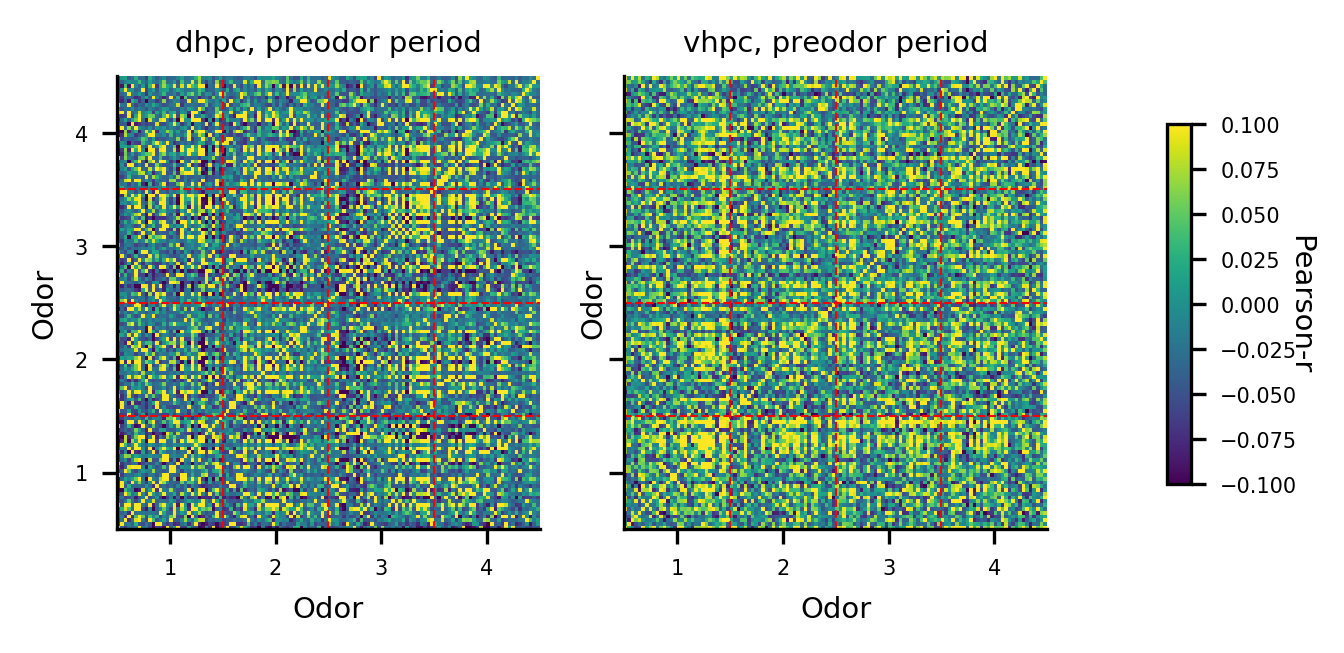

In [96]:
tb = 4 #which time bin do you wish to plot?

fig, ax = pl.subplots(1, 2, figsize=(4, 2), sharex=True, sharey=True)
for r, reg in zip(range(2),['dhpc','vhpc']):
    im = ax[r].pcolormesh(eval("corrs_tb%s_post_%s_mean"%(tb,reg)),vmin=-0.1, vmax=0.1)

    pt.nicer_plot(ax[r])
    ax[r].set_xlim(0, eval("corrs_tb%s_post_%s_mean"%(tb,reg)).shape[0])
    ax[r].set_xticks(np.arange(0, eval("corrs_tb%s_post_%s_mean"%(tb,reg)).shape[0], eval("corrs_tb%s_post_%s_mean"%(tb,reg)).shape[0]/len(pattern_ids))+eval("corrs_tb%s_post_%s_mean"%(tb,reg)).shape[0]/len(pattern_ids)/2)
    ax[r].set_xticklabels(pattern_ids)
    ax[r].set_ylim(0, eval("corrs_tb%s_post_%s_mean"%(tb,reg)).shape[0])
    ax[r].set_yticks(np.arange(0, eval("corrs_tb%s_post_%s_mean"%(tb,reg)).shape[0], eval("corrs_tb%s_post_%s_mean"%(tb,reg)).shape[0]/len(pattern_ids))+eval("corrs_tb%s_post_%s_mean"%(tb,reg)).shape[0]/len(pattern_ids)/2)
    ax[r].set_yticklabels(pattern_ids)
    ax[r].vlines(range(30, len(pattern_ids)*30, 30), 0, eval("corrs_tb%s_post_%s_mean"%(tb,reg)).shape[0],
              color='r', linestyle='dashed', lw=0.5)
    ax[r].hlines(range(30, len(pattern_ids)*30, 30), 0, eval("corrs_tb%s_post_%s_mean"%(tb,reg)).shape[0],
              color='r', linestyle='dashed', lw=0.5)
    
    ax[r].set_xlabel('Odor')
    ax[r].set_ylabel('Odor')
    
    ax[r].set_title(reg+', preodor period')

ax = fig.add_axes((1, 0.2, 0.02, 0.6))
fig.colorbar(im, cax=ax)
ax.set_ylabel('Pearson-r',rotation=-90)


# axs[0].set_title('DG', fontsize=7)
# axs[1].set_title('LEC', fontsize=7)
fig.savefig('../figures/%s_BIG_baseline_late.pdf'%NOTEBOOK_NAME)

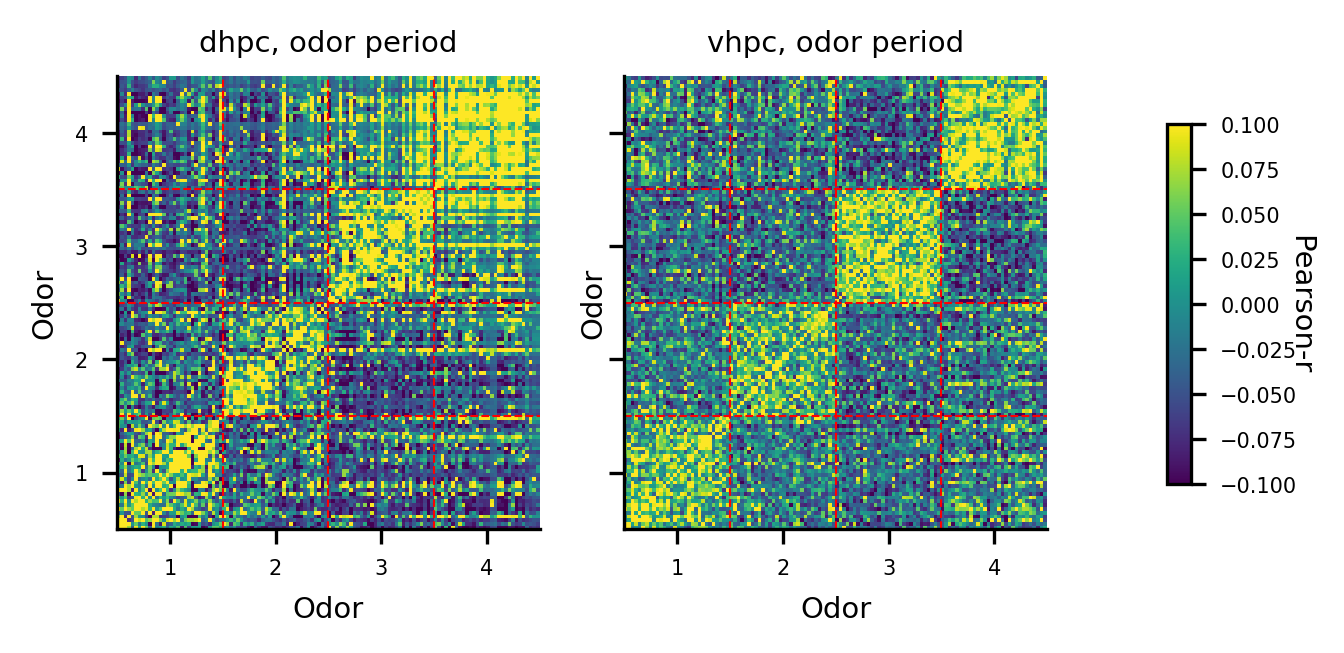

In [97]:
tb = 6 #which time bin do you wish to plot?

fig, ax = pl.subplots(1, 2, figsize=(4, 2), sharex=True, sharey=True)
for r, reg in zip(range(2),['dhpc','vhpc']):
    im = ax[r].pcolormesh(eval("corrs_tb%s_post_%s_mean"%(tb,reg)),vmin=-0.1, vmax=0.1)

    pt.nicer_plot(ax[r])
    ax[r].set_xlim(0, eval("corrs_tb%s_post_%s_mean"%(tb,reg)).shape[0])
    ax[r].set_xticks(np.arange(0, eval("corrs_tb%s_post_%s_mean"%(tb,reg)).shape[0], eval("corrs_tb%s_post_%s_mean"%(tb,reg)).shape[0]/len(pattern_ids))+eval("corrs_tb%s_post_%s_mean"%(tb,reg)).shape[0]/len(pattern_ids)/2)
    ax[r].set_xticklabels(pattern_ids)
    ax[r].set_ylim(0, eval("corrs_tb%s_post_%s_mean"%(tb,reg)).shape[0])
    ax[r].set_yticks(np.arange(0, eval("corrs_tb%s_post_%s_mean"%(tb,reg)).shape[0], eval("corrs_tb%s_post_%s_mean"%(tb,reg)).shape[0]/len(pattern_ids))+eval("corrs_tb%s_post_%s_mean"%(tb,reg)).shape[0]/len(pattern_ids)/2)
    ax[r].set_yticklabels(pattern_ids)
    ax[r].vlines(range(30, len(pattern_ids)*30, 30), 0, eval("corrs_tb%s_post_%s_mean"%(tb,reg)).shape[0],
              color='r', linestyle='dashed', lw=0.5)
    ax[r].hlines(range(30, len(pattern_ids)*30, 30), 0, eval("corrs_tb%s_post_%s_mean"%(tb,reg)).shape[0],
              color='r', linestyle='dashed', lw=0.5)
    
    ax[r].set_xlabel('Odor')
    ax[r].set_ylabel('Odor')
    
    ax[r].set_title(reg+', odor period')

ax = fig.add_axes((1, 0.2, 0.02, 0.6))
fig.colorbar(im, cax=ax)
ax.set_ylabel('Pearson-r',rotation=-90)


# axs[0].set_title('DG', fontsize=7)
# axs[1].set_title('LEC', fontsize=7)
fig.savefig('../figures/%s_BIG_odor_late.pdf'%NOTEBOOK_NAME)

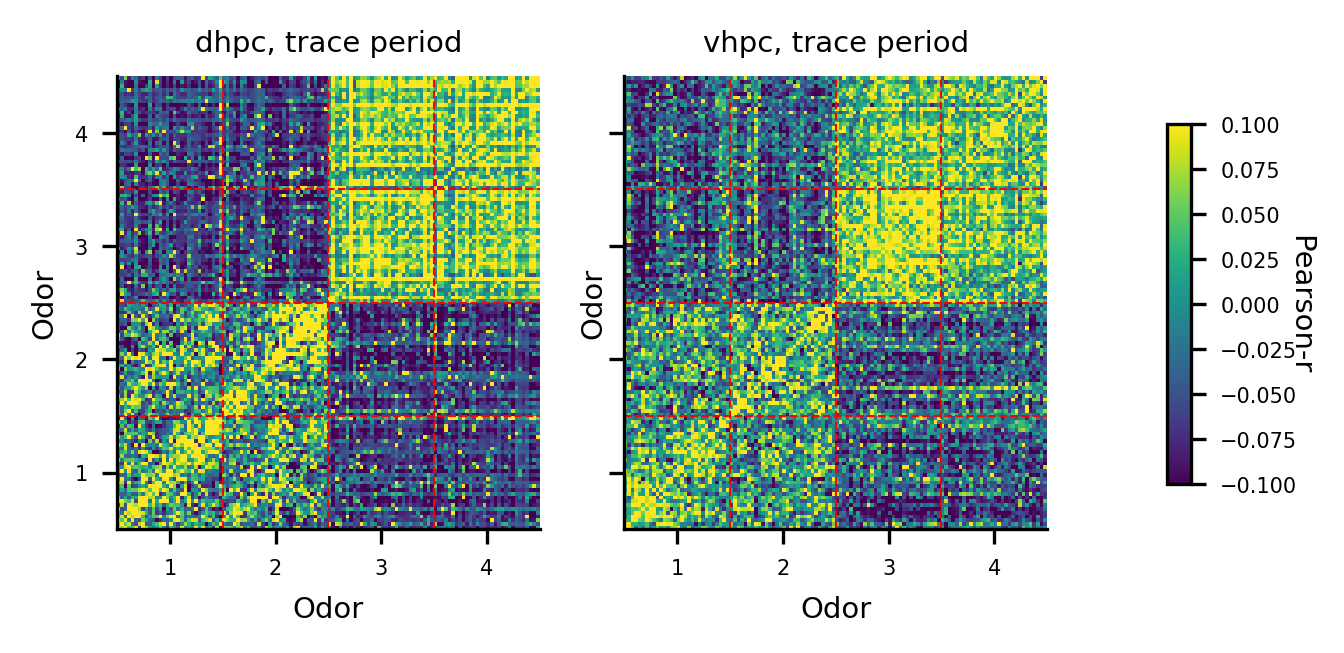

In [98]:
tb = 8 #which time bin do you wish to plot?

fig, ax = pl.subplots(1, 2, figsize=(4, 2), sharex=True, sharey=True)
for r, reg in zip(range(2),['dhpc','vhpc']):
    im = ax[r].pcolormesh(eval("corrs_tb%s_post_%s_mean"%(tb,reg)),vmin=-0.1, vmax=0.1)

    pt.nicer_plot(ax[r])
    ax[r].set_xlim(0, eval("corrs_tb%s_post_%s_mean"%(tb,reg)).shape[0])
    ax[r].set_xticks(np.arange(0, eval("corrs_tb%s_post_%s_mean"%(tb,reg)).shape[0], eval("corrs_tb%s_post_%s_mean"%(tb,reg)).shape[0]/len(pattern_ids))+eval("corrs_tb%s_post_%s_mean"%(tb,reg)).shape[0]/len(pattern_ids)/2)
    ax[r].set_xticklabels(pattern_ids)
    ax[r].set_ylim(0, eval("corrs_tb%s_post_%s_mean"%(tb,reg)).shape[0])
    ax[r].set_yticks(np.arange(0, eval("corrs_tb%s_post_%s_mean"%(tb,reg)).shape[0], eval("corrs_tb%s_post_%s_mean"%(tb,reg)).shape[0]/len(pattern_ids))+eval("corrs_tb%s_post_%s_mean"%(tb,reg)).shape[0]/len(pattern_ids)/2)
    ax[r].set_yticklabels(pattern_ids)
    ax[r].vlines(range(30, len(pattern_ids)*30, 30), 0, eval("corrs_tb%s_post_%s_mean"%(tb,reg)).shape[0],
              color='r', linestyle='dashed', lw=0.5)
    ax[r].hlines(range(30, len(pattern_ids)*30, 30), 0, eval("corrs_tb%s_post_%s_mean"%(tb,reg)).shape[0],
              color='r', linestyle='dashed', lw=0.5)
    
    ax[r].set_xlabel('Odor')
    ax[r].set_ylabel('Odor')
    
    ax[r].set_title(reg+', trace period')

ax = fig.add_axes((1, 0.2, 0.02, 0.6))
fig.colorbar(im, cax=ax)
ax.set_ylabel('Pearson-r',rotation=-90)


# axs[0].set_title('DG', fontsize=7)
# axs[1].set_title('LEC', fontsize=7)
fig.savefig('../figures/%s_BIG_trace_late.pdf'%NOTEBOOK_NAME)